In [1]:
import pandas as pd

In [2]:
data = pd.read_excel(r"C:\Users\paris\OneDrive\Desktop\Corizo\Minor Project Data set (Stock Price Prediction).xlsx")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [3]:
data['Date'] = pd.to_datetime(data.Date)

In [4]:
data.shape

(1009, 7)

In [5]:
data.drop('Adj Close', axis=1, inplace=True)
data.head()

,Date,Open,High,Low,Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,16906900


In [6]:
data.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [7]:
data.isna().any()

Date      False
Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

In [8]:
data.describe()

,Open,High,Low,Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,5.890430e+07


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1009 non-null   datetime64[ns]
 1   Open    1009 non-null   float64       
 2   High    1009 non-null   float64       
 3   Low     1009 non-null   float64       
 4   Close   1009 non-null   float64       
 5   Volume  1009 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 47.4 KB


<Axes: >

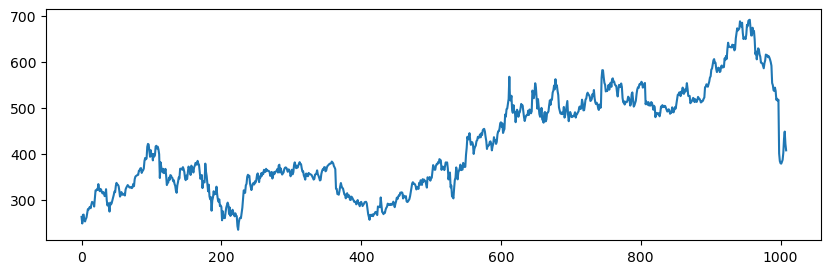

In [10]:
data['Open'].plot(figsize=(10,3))

In [11]:
x = data[['Open','High','Low','Volume']]
y = data['Close']

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0)

In [13]:
x_train.shape

(756, 4)

In [14]:
x_test.shape

(253, 4)

In [15]:
y_train.shape

(756,)

In [16]:
y_test.shape

(253,)

In [17]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score

In [18]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [19]:
regressor.coef_

array([-5.98637670e-01,  7.42752459e-01,  8.57948723e-01,  9.68159263e-08])

In [20]:
regressor.intercept_

-0.7077595587223868

In [21]:
predicted = regressor.predict(x_test)
x_test

,Open,High,Low,Volume
801,557.000000,559.750000,550.299988,2720300
311,378.000000,383.500000,374.510010,5398200
85,368.540009,368.700012,357.799988,8278000
435,278.049988,285.750000,277.350006,6248400
204,260.549988,266.250000,253.800003,12498600
...,...,...,...,...
583,418.829987,426.720001,415.980011,3743700
200,283.790009,285.089996,269.149994,12993800
767,525.000000,548.539978,518.280029,4136500
1000,379.140015,387.709991,365.130005,15145800


In [22]:
predicted.shape

(253,)

In [23]:
df = pd.DataFrame(y_test, predicted)
dfr = pd.DataFrame({'Actual_Price':y_test, 'Predicted_Price':predicted}).sort_index()
dfra = dfr.sort_values('Actual_Price', ascending=False)
dfrp = dfr.sort_values('Predicted_Price', ascending=False)
dfr.head()

,Actual_Price,Predicted_Price
1,265.720001,260.518692
5,257.950012,255.291581
8,280.269989,276.638707
14,294.160004,293.264409
18,301.049988,296.881076


In [24]:
dfra.head()

,Actual_Price,Predicted_Price
954,691.690002,695.788928
943,677.719971,679.612370
936,664.780029,663.184749
948,655.989990,656.897477
935,653.159973,648.748862


In [25]:
dfrp.head()

,Actual_Price,Predicted_Price
954,691.690002,695.788928
943,677.719971,679.612370
936,664.780029,663.184749
948,655.989990,656.897477
946,645.719971,650.117013


In [26]:
regressor.score(x_test, y_test)

0.9982601041694819

In [27]:
import math

In [28]:
print('Mean_Squared_Error: ', metrics.mean_squared_error(y_test, predicted))
print('Root_Mean_Squared_Error: ', math.sqrt(metrics.mean_squared_error(y_test, predicted)))

Mean_Squared_Error:  19.163612341166917
Root_Mean_Squared_Error:  4.377626336402745


# Comparing Actual and Predicted Prices

Text(0.5, 1.0, 'Top 10 Actual Prices')

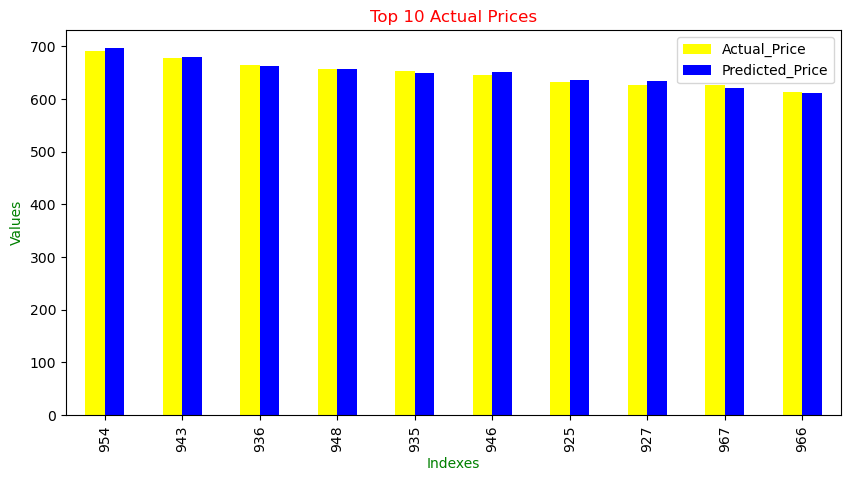

In [29]:
import matplotlib.pyplot as plt
grapha = dfra.head(10)
grapha.plot(kind='bar', color=['yellow','blue'], figsize=(10,5))
plt.xlabel('Indexes', color='green')
plt.ylabel('Values', color='green')
plt.title('Top 10 Actual Prices', color='red')

Text(0.5, 1.0, 'Top 10 Predicted Prices')

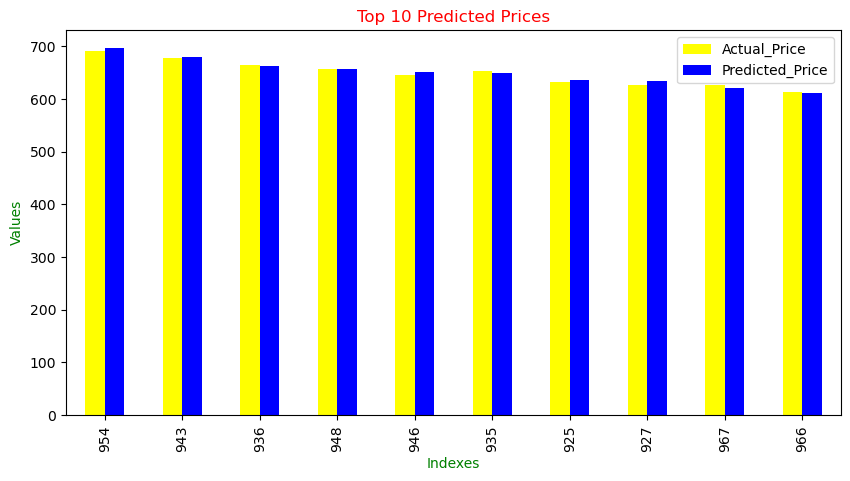

In [30]:
import matplotlib.pyplot as plt
graphp = dfrp.head(10)
graphp.plot(kind='bar', color=['yellow','blue'], figsize=(10,5))
plt.xlabel('Indexes', color='green')
plt.ylabel('Values', color='green')
plt.title('Top 10 Predicted Prices', color='red')

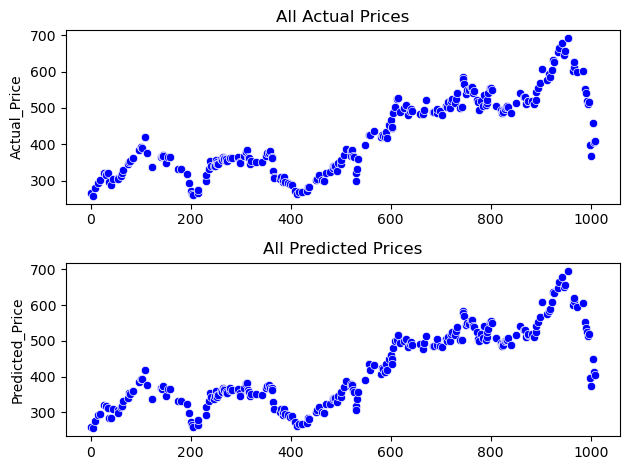

In [31]:
import seaborn as sns

plt.subplot(2,1,1)
sns.scatterplot(data=dfr['Actual_Price'], color='blue')
plt.title('All Actual Prices')

plt.subplot(2,1,2)
sns.scatterplot(data = dfr['Predicted_Price'], color='blue')
plt.title('All Predicted Prices')

plt.tight_layout()